In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   

args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 128                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 150

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

In [3]:
args.seed                             = 5


args.data_name                        =  "hapt"
window_seconds                        = 2.56
args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.regulatization_tradeoff          = 0.0001
args.number_wavelet_filtering = 10


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"

config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



In [4]:
args.filter_scaling_factor = 1
args.model_type              = "deepconvlstm"

In [5]:
exp = Exp(args)

Use GPU: cuda:0
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Done!
Parameter : 474879
Set the seed as :  5


 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 10 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.00065833 0.00068634 0.00072939 0.00060827 0.00057176 0.00057143
 0.00775194 0.01010101 0.00632911 0.0070922  0.00568182 0.00684932]
================ Build the model ================ 
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Train data number :  10339
The number of classes is :  12
The input_length  is :  128
The channel_in is :  6
Validation data number :  1149
Test data number :  6632
Epoch: 1 cost time: 21.560863256454468
VALI: Epoch: 1, Steps: 81 | Train Loss: 0.9904006  Vali Loss: 0.4652306 Vali Accuracy: 0.8398607  Vali w

Epoch: 27 cost time: 21.97149395942688
VALI: Epoch: 27, Steps: 81 | Train Loss: 0.0525236  Vali Loss: 0.1227495 Vali Accuracy: 0.9573542  Vali weighted F1: 0.9570826  Vali macro F1 0.8199319 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 28 cost time: 21.822519063949585
VALI: Epoch: 28, Steps: 81 | Train Loss: 0.0515677  Vali Loss: 0.1204207 Vali Accuracy: 0.9538729  Vali weighted F1: 0.9539801  Vali macro F1 0.8090387 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 29 cost time: 22.211491107940674
VALI: Epoch: 29, Steps: 81 | Train Loss: 0.0522693  Vali Loss: 0.1196795 Vali Accuracy: 0.9538729  Vali weighted F1: 0.9543591  Vali macro F1 0.8114820 
new best score!!!!
Validation loss decreased (0.119768 --> 0.119680).  Saving model ...
new best score!!!!
Epoch: 30 cost time: 21.63616418838501
VALI: Epoch: 30, Steps: 81 | Train Loss: 0.0507313  Vali Loss: 0.1247839 Vali Accuracy: 0.9512620  Vali weighted F1: 0

VALI: Epoch: 56, Steps: 81 | Train Loss: 0.0413143  Vali Loss: 0.1220171 Vali Accuracy: 0.9556136  Vali weighted F1: 0.9555708  Vali macro F1 0.8162505 
EarlyStopping counter: 12 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 57 cost time: 20.72569727897644
VALI: Epoch: 57, Steps: 81 | Train Loss: 0.0412915  Vali Loss: 0.1220096 Vali Accuracy: 0.9556136  Vali weighted F1: 0.9555708  Vali macro F1 0.8162505 
EarlyStopping counter: 13 out of 15
Learning rate adjusting counter: 3 out of 5
Epoch: 58 cost time: 20.764172315597534
VALI: Epoch: 58, Steps: 81 | Train Loss: 0.0419785  Vali Loss: 0.1220085 Vali Accuracy: 0.9556136  Vali weighted F1: 0.9555708  Vali macro F1 0.8162505 
EarlyStopping counter: 14 out of 15
Learning rate adjusting counter: 4 out of 5
Epoch: 59 cost time: 20.693605184555054
VALI: Epoch: 59, Steps: 81 | Train Loss: 0.0418645  Vali Loss: 0.1219931 Vali Accuracy: 0.9556136  Vali weighted F1: 0.9555708  Vali macro F1 0.8162505 
EarlyStopping counter: 15 out

KeyboardInterrupt: 

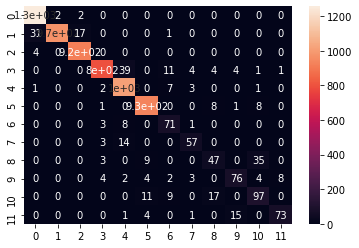

In [6]:
exp.train()